In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import os


In [64]:
train_dir = "dataset/train"
val_dir = "dataset/validation"


train_empty_dir = "dataset/train/empty"
train_full_dir  = "dataset/train/full"


In [76]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 30


In [77]:
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalisation
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [78]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)



Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [80]:
num_empty = len(os.listdir(train_empty_dir))
num_full  = len(os.listdir(train_full_dir))

print(f"Nombre d'images dans train/empty : {num_empty}")
print(f"Nombre d'images dans train/full  : {num_full}")

Nombre d'images dans train/empty : 160
Nombre d'images dans train/full  : 160


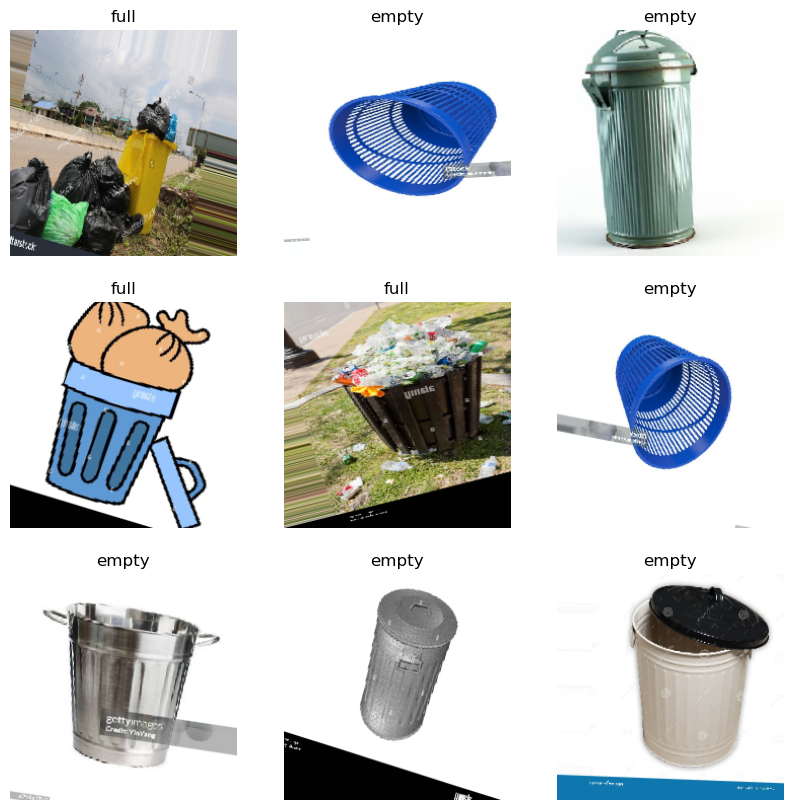

In [81]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)   # Un batch

plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title("empty" if labels[i]==0 else "full")
    plt.axis("off")

plt.show()


In [82]:
print(train_generator.class_indices)

{'empty': 0, 'full': 1}


In [83]:
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # On gèle les couches de base


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

In [85]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')   # Empty vs Full
])


In [86]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [87]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.6219 - loss: 0.6954 - val_accuracy: 0.6250 - val_loss: 0.6363
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6594 - loss: 0.5819 - val_accuracy: 0.7750 - val_loss: 0.5418
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7906 - loss: 0.4643 - val_accuracy: 0.7875 - val_loss: 0.4731
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8094 - loss: 0.4520 - val_accuracy: 0.8250 - val_loss: 0.4391
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8594 - loss: 0.3827 - val_accuracy: 0.8250 - val_loss: 0.4133
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8625 - loss: 0.3683 - val_accuracy: 0.8625 - val_loss: 0.3832
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8656 - loss: 0.3564 - val_accuracy: 0.8625 - val_loss: 0.3581
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8875 - loss: 0.2967 - val_accuracy: 0.8500 - val_loss:

In [88]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy = {acc*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 705ms/step - accuracy: 0.9500 - loss: 0.1736
Validation Accuracy = 95.00%


In [89]:
model.save("poubelle_vide_pleine.h5")
print("Modèle sauvegardé ✔")

Modèle sauvegardé ✔
